In [56]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing dataset

df= pd.read_csv("C:/Tooltest-dataset.csv") 
print (df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [57]:
from collections import Counter
Counter(df["Target"])
df.head()
df.shape
df.describe()
X = df.iloc[:, 0:11].values
y = df.iloc[:, 11].values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  Target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,Target
Target,1.000000
alcohol,0.385132
pH,0.093510
sulphates,0.047410
free sulfur dioxide,-0.023413
citric acid,-0.035330
volatile acidity,-0.067225
fixed acidity,-0.080748
residual sugar,-0.117085
total sulfur dioxide,-0.162202


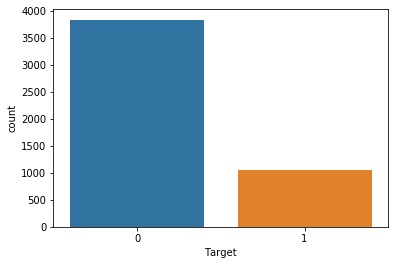

In [58]:
#Exploratory data analysis

sns.countplot(df['Target'])
df.isnull().sum() 
df.info()

#Important variables

df.corr()[['Target']].sort_values(by='Target', ascending = False)

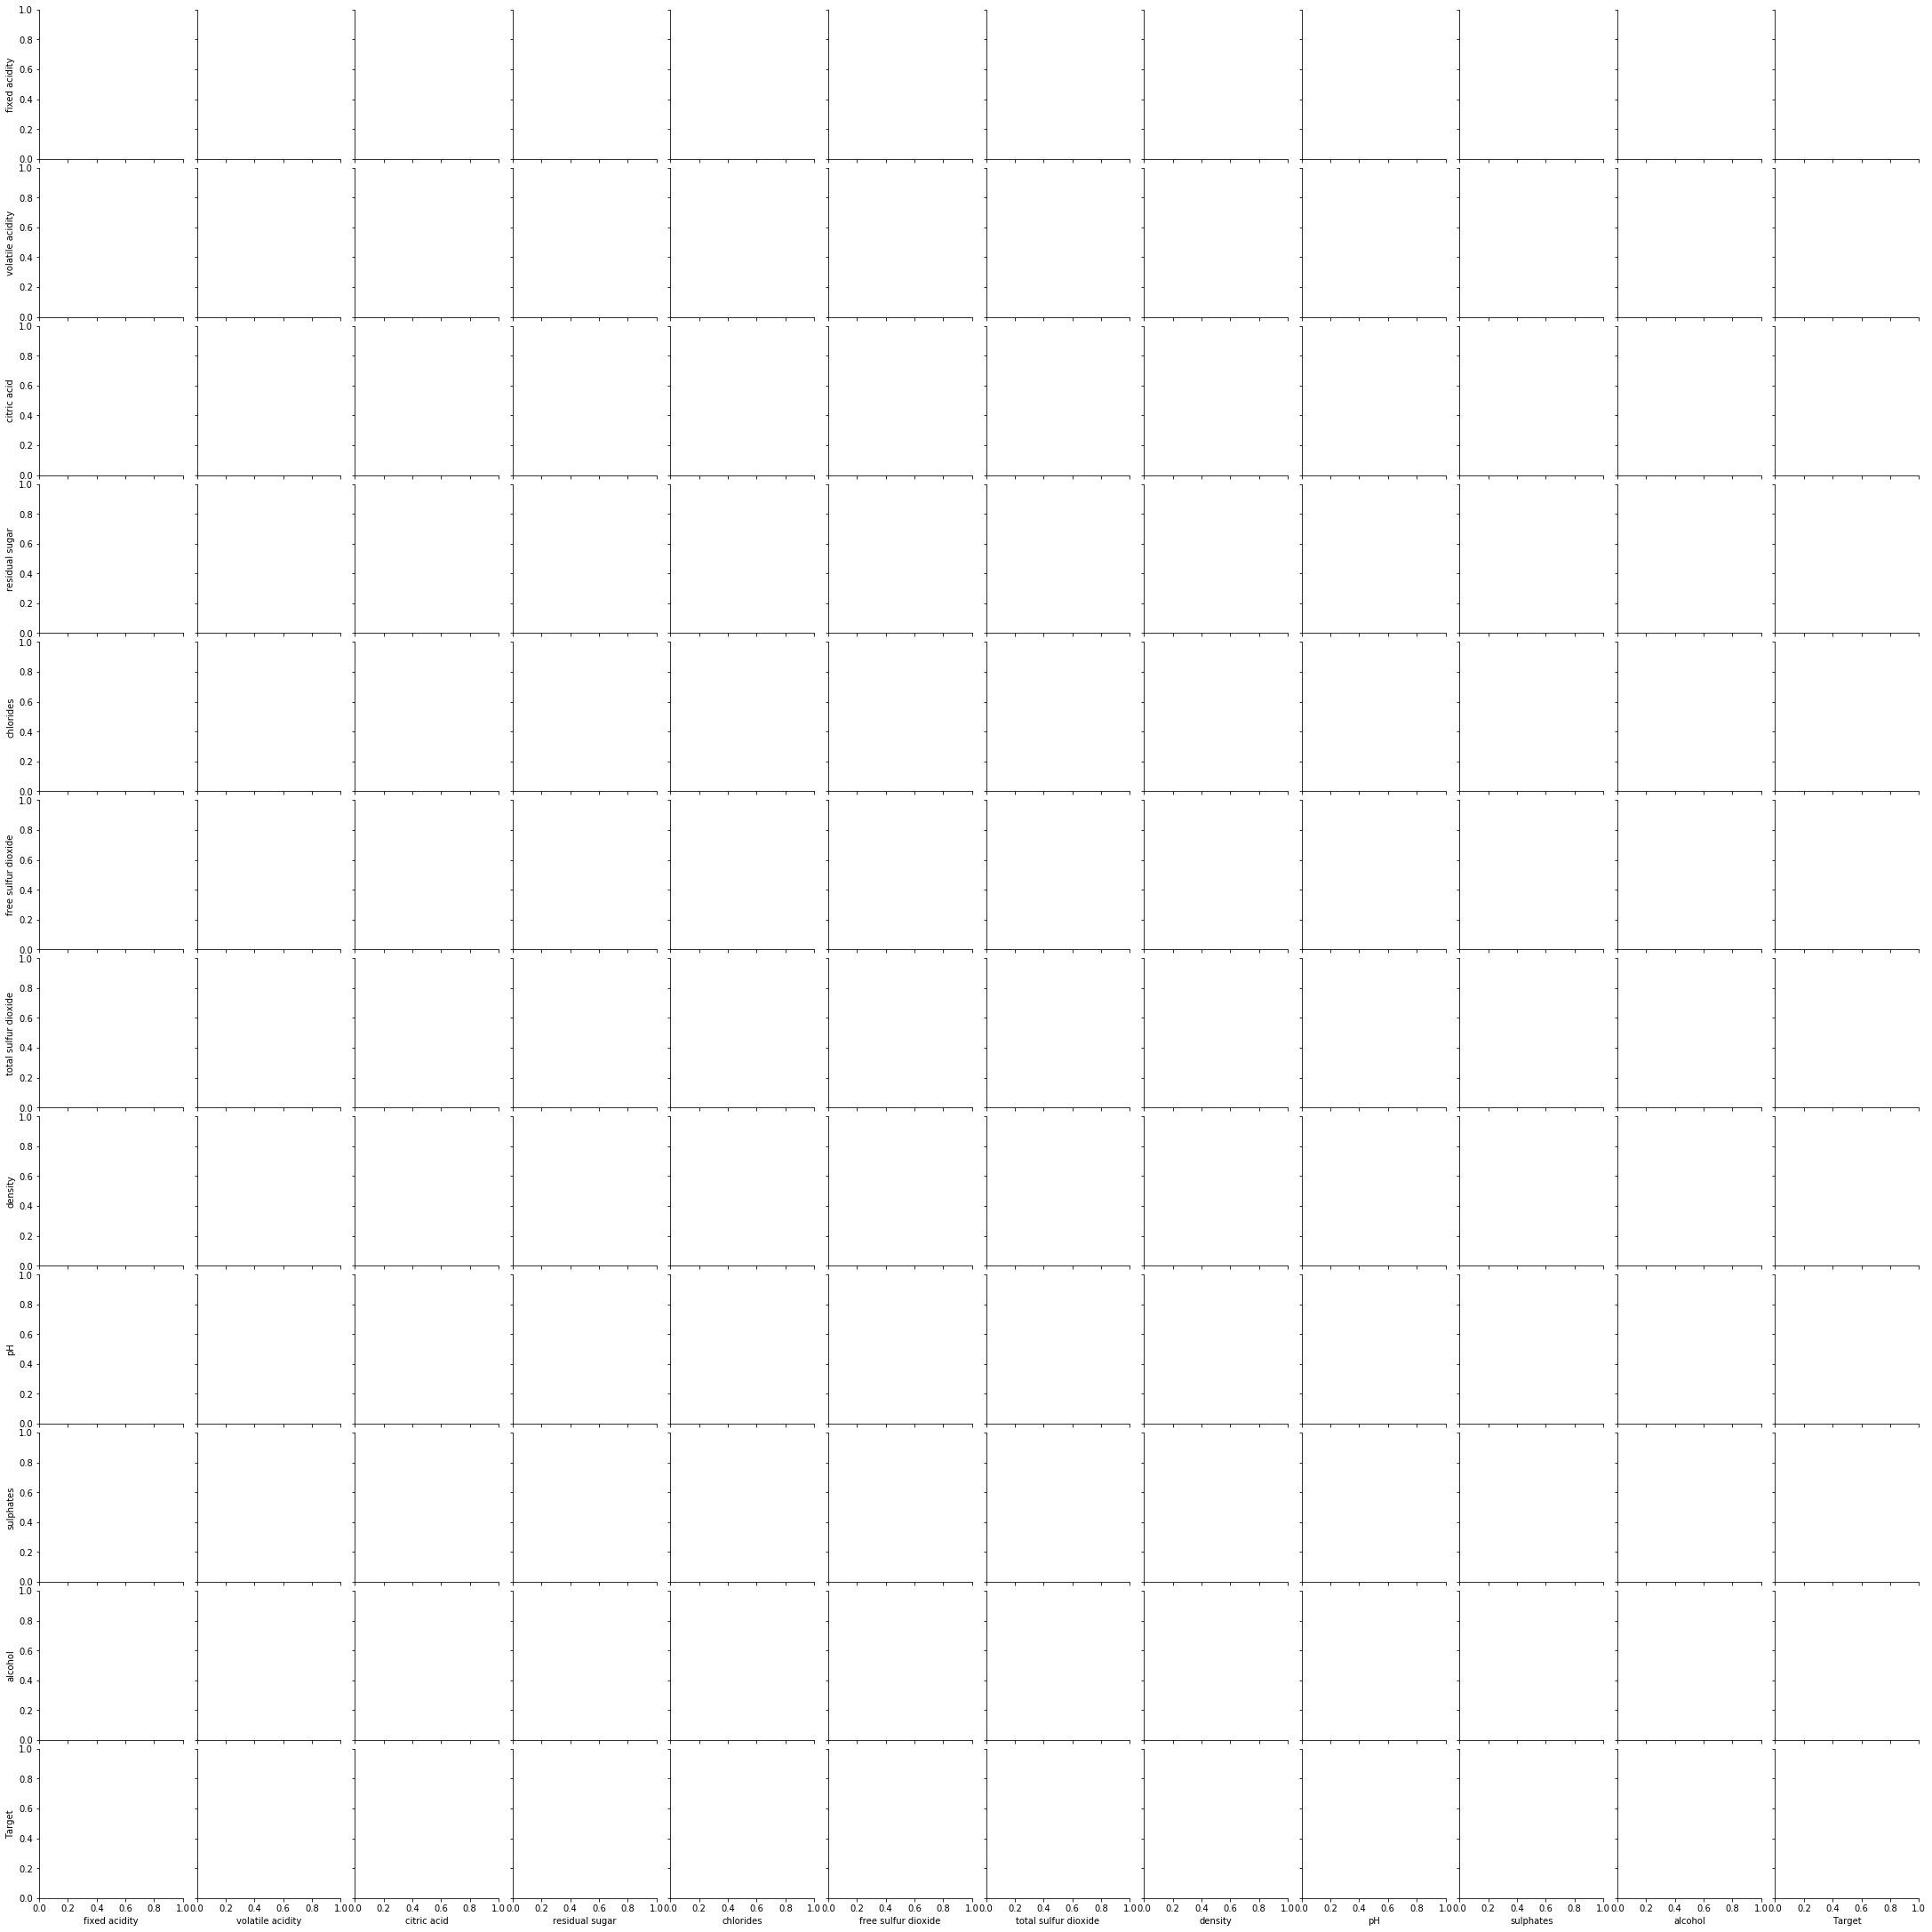

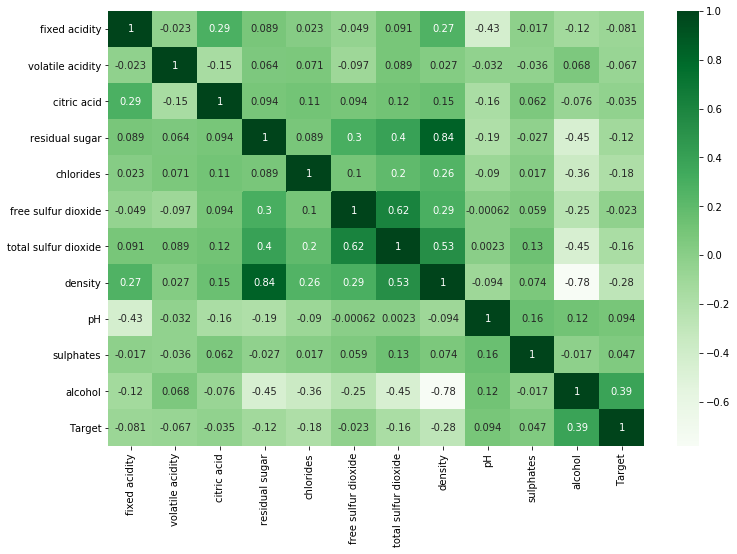

In [63]:
g = sns.PairGrid(df)

#Correlation heat map

plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(), cmap='Greens', annot=True)
plt.show()

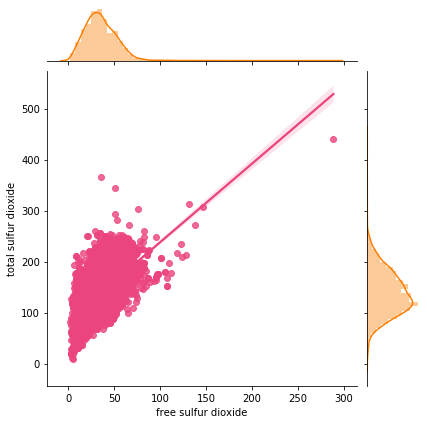

In [61]:
# Plot JointPlot
# free sulfur dioxide ~ total sulfur dioxide

g = sns.JointGrid(x='free sulfur dioxide', y='total sulfur dioxide', data=df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

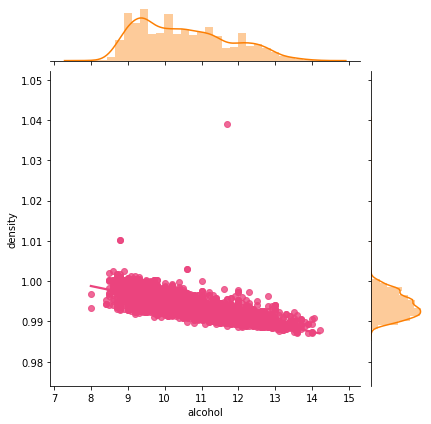

In [62]:
# Plot JointPlot
# alcohol ~  density

g = sns.JointGrid(x='alcohol', y='density', data=df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

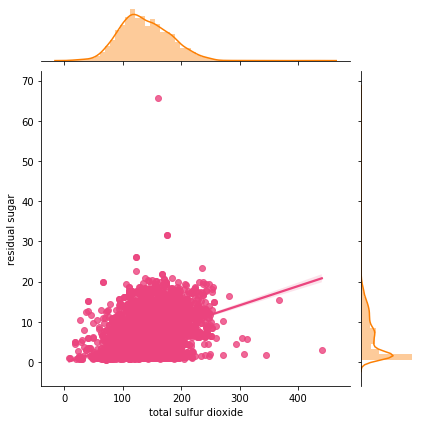

In [64]:
# Plot JointPlot
# total sulfur dioxide ~ residual sugar

g = sns.JointGrid(x='total sulfur dioxide', y='residual sugar', data=df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

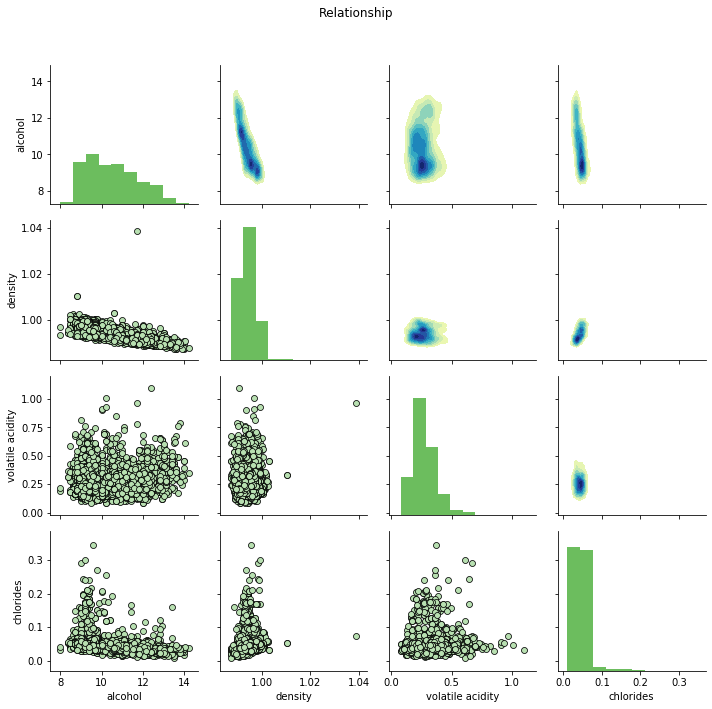

In [51]:
g = sns.PairGrid(df[['alcohol','density','volatile acidity','chlorides']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

#Conclusion

#Strong relations :
#free sulfur dioxide ~ total sulfur dioxide
#alcohol ~ density
#Moderate relations :
#total sulfur dioxide ~ residual sugar
#density ~ residual sugar

In [35]:
## Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
#Applying the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2 )
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [38]:
#Fiiting the Logistic Regression model to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)